In [133]:
import pandas as pd

df = pd.read_excel('disaster-in-vietnam_1900-to-2024.xlsx')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1953-0019-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.156133,NaN,2006-09-17,2023-09-25
1,1956-0050-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.288532,NaN,2003-07-01,2023-09-25
2,1964-0004-VNM,Yes,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25
3,1964-0063-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Iris,VNM,...,NaN,NaN,NaN,NaN,50000.0,471770.0,10.598376,NaN,2006-09-17,2023-09-25
4,1964-0102-VNM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     335 non-null    object 
 1   Historic                                   335 non-null    object 
 2   Classification Key                         335 non-null    object 
 3   Disaster Group                             335 non-null    object 
 4   Disaster Subgroup                          335 non-null    object 
 5   Disaster Type                              335 non-null    object 
 6   Disaster Subtype                           335 non-null    object 
 7   External IDs                               39 non-null     object 
 8   Event Name                                 144 non-null    object 
 9   ISO                                        335 non-null    object 
 10  Country  

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,296
Event Name,191
ISO,0


In [134]:
df['Start Date'] = pd.to_datetime(df[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), errors='coerce')
df['End Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].astype(str).agg('-'.join, axis=1), errors='coerce')


impact_columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', 'Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'Reconstruction Costs (\'000 US$)', 'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)']
for col in impact_columns:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("\nDataFrame Info after processing:")
df.info()

print("\nMissing values per column after processing:")
display(df[impact_columns + ['Start Date', 'End Date']].isnull().sum())


DataFrame Info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     335 non-null    object        
 1   Historic                                   335 non-null    object        
 2   Classification Key                         335 non-null    object        
 3   Disaster Group                             335 non-null    object        
 4   Disaster Subgroup                          335 non-null    object        
 5   Disaster Type                              335 non-null    object        
 6   Disaster Subtype                           335 non-null    object        
 7   External IDs                               39 non-null     object        
 8   Event Name                                 144 non-null    object 

/tmp/ipython-input-3206617344.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3206617344.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,0
Total Deaths,0
No. Injured,0
No. Affected,0
No. Homeless,0
Total Affected,0
Total Damage ('000 US$),0
"Total Damage, Adjusted ('000 US$)",0
Reconstruction Costs ('000 US$),0
"Reconstruction Costs, Adjusted ('000 US$)",0
Insured Damage ('000 US$),0


In [135]:
impact_columns_to_check = ['Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'Reconstruction Costs (\'000 US$)', 'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)']
print("\nData types of impact columns:")
print(df[impact_columns_to_check].dtypes)

for col in impact_columns_to_check:
    if col in df.columns:
        non_numeric_values = df[col][pd.to_numeric(df[col], errors='coerce').isna()].unique()
        if len(non_numeric_values) > 0:
            print(f"\nNon-numeric values in '{col}':")
            print(non_numeric_values)


Data types of impact columns:
Total Damage ('000 US$)                      float64
Total Damage, Adjusted ('000 US$)            float64
Reconstruction Costs ('000 US$)              float64
Reconstruction Costs, Adjusted ('000 US$)    float64
Insured Damage ('000 US$)                    float64
Insured Damage, Adjusted ('000 US$)          float64
dtype: object


In [136]:
print(df.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update', 'Start Date', 'End Date'],
      dtype='object')


In [137]:

df['Start Year'] = df['Start Year'].fillna(1).astype(int)
df['Start Month'] = df['Start Month'].fillna(1).astype(int)
df['Start Day'] = df['Start Day'].fillna(1).astype(int)
df['End Year'] = df['End Year'].fillna(1).astype(int)
df['End Month'] = df['End Month'].fillna(1).astype(int)
df['End Day'] = df['End Day'].fillna(1).astype(int)

df['Start Date'] = pd.to_datetime(df[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), errors='coerce')
df['End Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

impact_columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', 'Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'Reconstruction Costs (\'000 US$)', 'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)']
for col in impact_columns:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("\nDataFrame Info after processing:")
df.info()

print("\nMissing values per column after processing:")
display(df[impact_columns + ['Start Date', 'End Date']].isnull().sum())


DataFrame Info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     335 non-null    object        
 1   Historic                                   335 non-null    object        
 2   Classification Key                         335 non-null    object        
 3   Disaster Group                             335 non-null    object        
 4   Disaster Subgroup                          335 non-null    object        
 5   Disaster Type                              335 non-null    object        
 6   Disaster Subtype                           335 non-null    object        
 7   External IDs                               39 non-null     object        
 8   Event Name                                 144 non-null    object 

,0
Total Deaths,0
No. Injured,0
No. Affected,0
No. Homeless,0
Total Affected,0
Total Damage ('000 US$),0
"Total Damage, Adjusted ('000 US$)",0
Reconstruction Costs ('000 US$),0
"Reconstruction Costs, Adjusted ('000 US$)",0
Insured Damage ('000 US$),0


In [138]:

df['Location'] = df['Location'].fillna('Unknown')
df['Admin Units'] = df['Admin Units'].fillna('Unknown')

print("\nMissing values after handling categorical columns:")
display(df[['Location', 'Admin Units', 'Start Date', 'End Date'] + impact_columns].isnull().sum())



Missing values after handling categorical columns:


,0
Location,0
Admin Units,0
Start Date,0
End Date,0
Total Deaths,0
No. Injured,0
No. Affected,0
No. Homeless,0
Total Affected,0
Total Damage ('000 US$),0


## Phân tích và trực quan hóa theo thời gian

Tạo biểu đồ dạng đường (Line Chart) hoặc biểu đồ cột (Bar Chart) thể hiện xu hướng số lượng sự kiện thời tiết cực đoan qua các năm hoặc tháng.


In [139]:

df['Start Year Actual'] = df['Start Date'].dt.year

yearly_disaster_counts = df['Start Year Actual'].value_counts().sort_index()

print("Yearly Disaster Counts:")
display(yearly_disaster_counts)

Yearly Disaster Counts:


,count
Start Year Actual,
1953,1
1956,1
1964,3
1966,1
1967,1
1970,1
1971,2
1973,1
1975,1


/tmp/ipython-input-2555591828.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




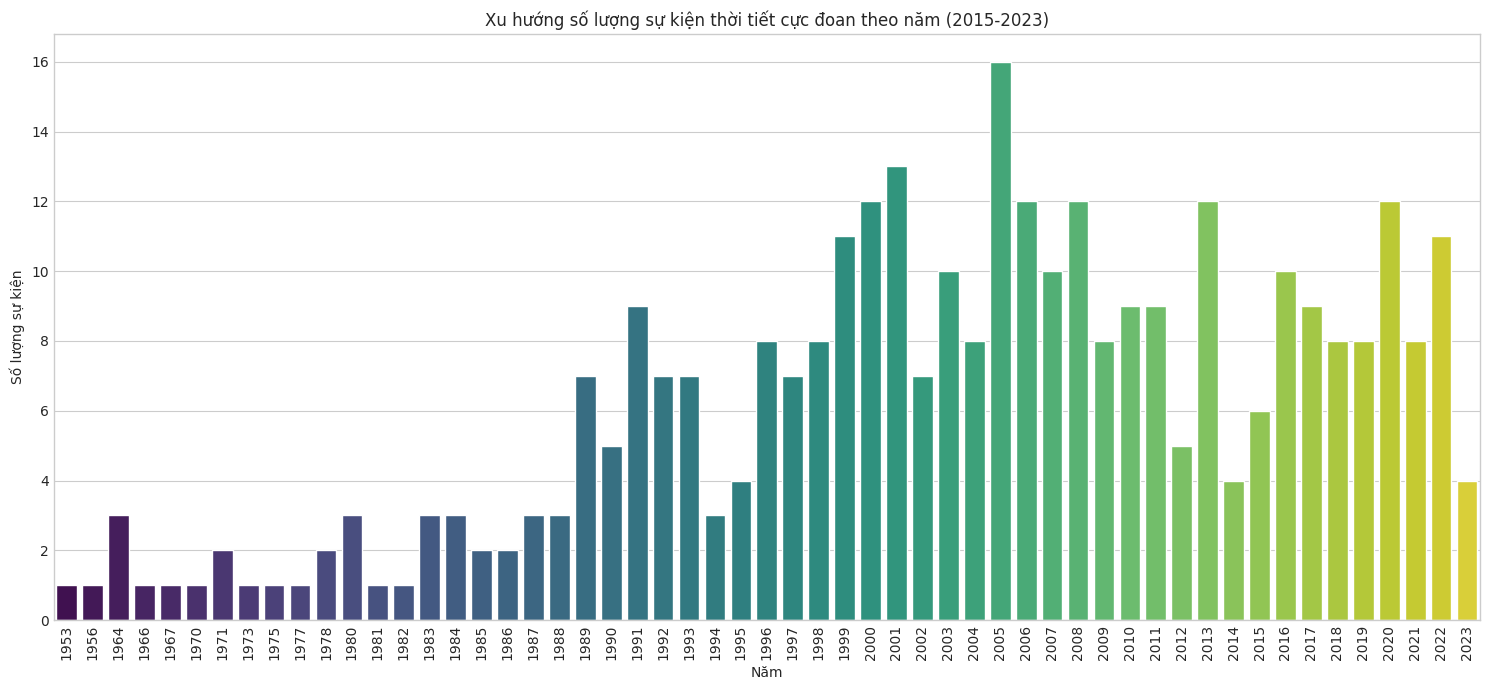

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 7))
sns.barplot(x=yearly_disaster_counts.index, y=yearly_disaster_counts.values, palette='viridis')

plt.xlabel("Năm")
plt.ylabel("Số lượng sự kiện")
plt.title("Xu hướng số lượng sự kiện thời tiết cực đoan theo năm (2015-2023)")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Phân tích và trực quan hóa theo loại hình thiên tai

Tạo biểu đồ cột (Bar Chart) hoặc biểu đồ tròn (Pie Chart) thể hiện phân bố các loại hình thiên tai (bão, lũ lụt, hạn hán, v.v.).


Distribution of Disaster Types:


,count
Disaster Type,
Storm,133
Flood,103
Road,20
Water,19
Epidemic,10
Drought,7
Fire (Miscellaneous),6
Air,6
Collapse (Industrial),6


/tmp/ipython-input-2487778648.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




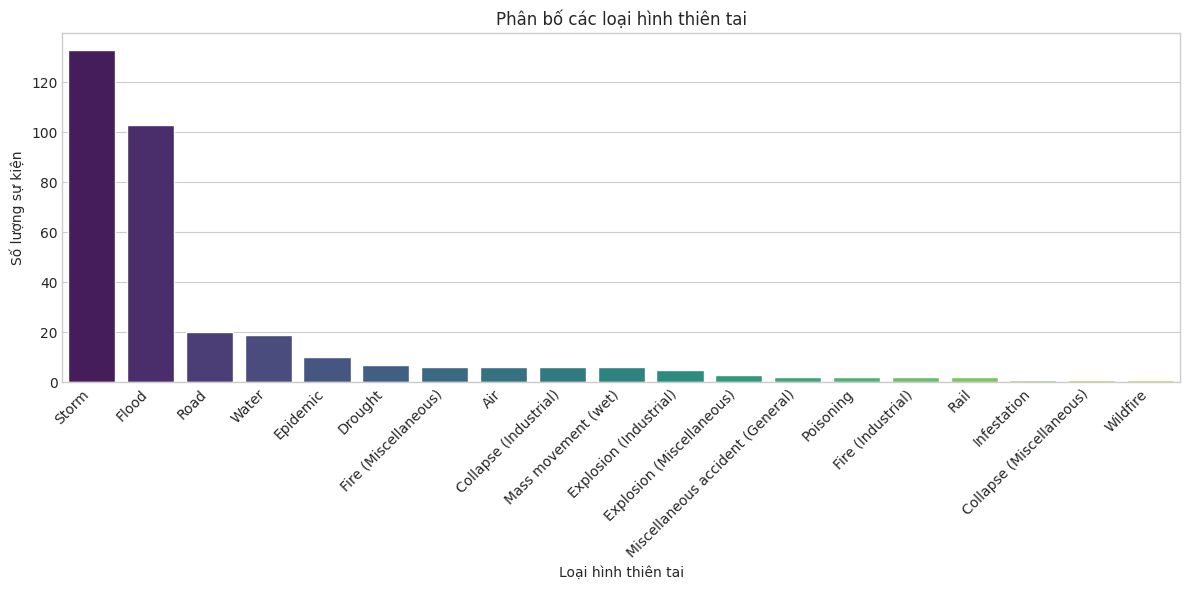

In [141]:

disaster_type_counts = df['Disaster Type'].value_counts()

print("Distribution of Disaster Types:")
display(disaster_type_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=disaster_type_counts.index, y=disaster_type_counts.values, palette='viridis')

plt.xlabel('Loại hình thiên tai')
plt.ylabel('Số lượng sự kiện')
plt.title('Phân bố các loại hình thiên tai')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Phân tích và trực quan hóa theo loại hình thiên tai

Phân tích và trực quan hóa tác động của từng loại hình thiên tai (số người chết, số người bị ảnh hưởng, thiệt hại kinh tế). Sử dụng biểu đồ cột nhóm (Grouped Bar Chart) hoặc biểu đồ thanh chồng (Stacked Bar Chart).


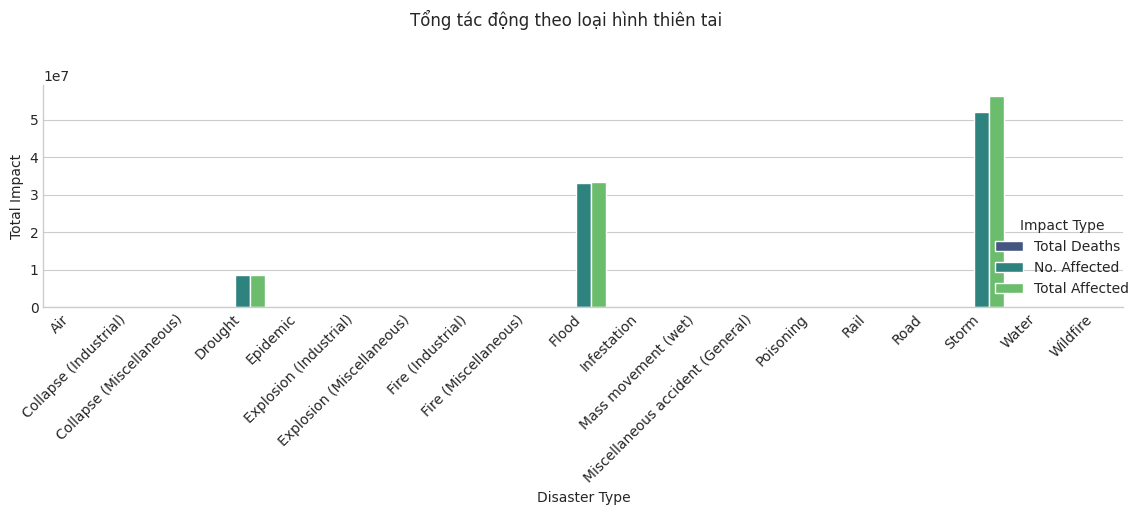

In [142]:

df_impact_by_type = df.groupby('Disaster Type')[['Total Deaths', 'No. Affected', 'Total Affected']].sum()

df_impact_by_type = df_impact_by_type.reset_index()

df_impact_melted = df_impact_by_type.melt(id_vars='Disaster Type', var_name='Impact Type', value_name='Total Impact')

g = sns.catplot(x='Disaster Type', y='Total Impact', hue='Impact Type', data=df_impact_melted, kind='bar', aspect=2, palette='viridis')

g.fig.suptitle('Tổng tác động theo loại hình thiên tai', y=1.02) # Adjust title position
g.set_xticklabels(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Phân tích và trực quan hóa theo địa lý

Sử dụng Choropleth Map để hiển thị phân bố số lượng sự kiện hoặc mức độ thiệt hại theo tỉnh/thành phố của Việt Nam. Cần dữ liệu ranh giới địa lý (có thể sử dụng file `vn.json` hoặc các file shapefile đã cung cấp).


In [143]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

vietnam_gdf = gpd.read_file('vn.json')

disaster_counts = {}
for index, row in df.iterrows():
    admin_units_str = row['Admin Units']

    if isinstance(admin_units_str, str) and admin_units_str != 'Unknown':
        try:

            admin_units_list = json.loads(admin_units_str)
            for unit in admin_units_list:

                province_name = unit.get('adm1_name')
                if province_name:

                    disaster_counts[province_name] = disaster_counts.get(province_name, 0) + 1
        except json.JSONDecodeError:

            print(f"Could not decode JSON for row {index}: {admin_units_str}")
            continue
    elif admin_units_str == 'Unknown':

        pass
    else:

        print(f"Unexpected value in 'Admin Units' for row {index}: {admin_units_str}")

disaster_counts_df = pd.DataFrame(list(disaster_counts.items()), columns=['ADM1_EN', 'disaster_count'])


print("\nDisaster Counts per Province:")
display(disaster_counts_df.head())


print("\nAdministrative Units in Disaster Data (first 5):")
display(disaster_counts_df['ADM1_EN'].head())

print("\nAdministrative Units in Geo Data (first 5):")
display(vietnam_gdf['name'].head())


Disaster Counts per Province:


,ADM1_EN,disaster_count
0,An Giang,16
1,Dong Thap,14
2,Kien Giang,11
3,Long An,12
4,Tien Giang,7



Administrative Units in Disaster Data (first 5):


,ADM1_EN
0,An Giang
1,Dong Thap
2,Kien Giang
3,Long An
4,Tien Giang



Administrative Units in Geo Data (first 5):


,name
0,Kon Tum
1,Đắk Nông
2,Đắk Lắk
3,Gia Lai
4,Bình Phước


In [144]:

print("\nColumns in GeoDataFrame:")
print(vietnam_gdf.columns)


Columns in GeoDataFrame:
Index(['source', 'id', 'name', 'geometry'], dtype='object')


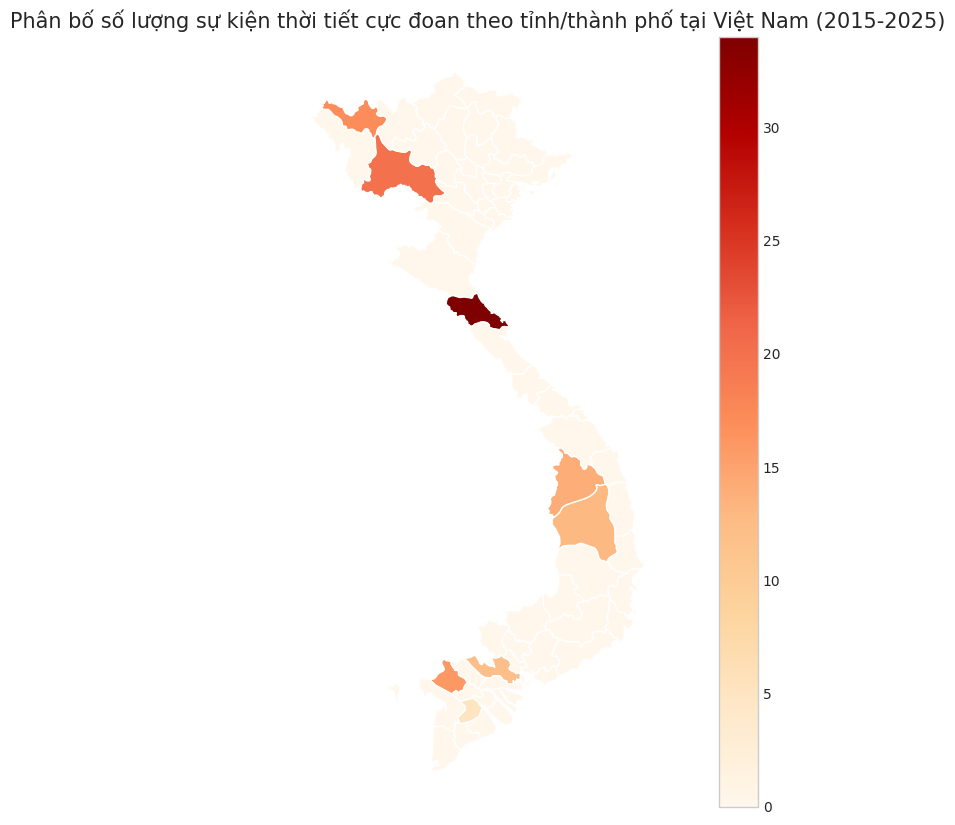

In [145]:

merged_gdf = vietnam_gdf.set_index('name').join(disaster_counts_df.set_index('ADM1_EN'))

merged_gdf['disaster_count'] = merged_gdf['disaster_count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged_gdf.plot(column='disaster_count',
                ax=ax,
                legend=True,
                cmap='OrRd',
                missing_kwds={'color': 'lightgrey', 'label': 'No data'})

ax.set_title('Phân bố số lượng sự kiện thời tiết cực đoan theo tỉnh/thành phố tại Việt Nam (2015-2025)', fontsize=15)

ax.set_axis_off()

plt.show()

## Phân tích mối quan hệ và tương quan

Tạo Scatter Plot để xem mối quan hệ giữa các biến số như số người chết và số người bị ảnh hưởng.


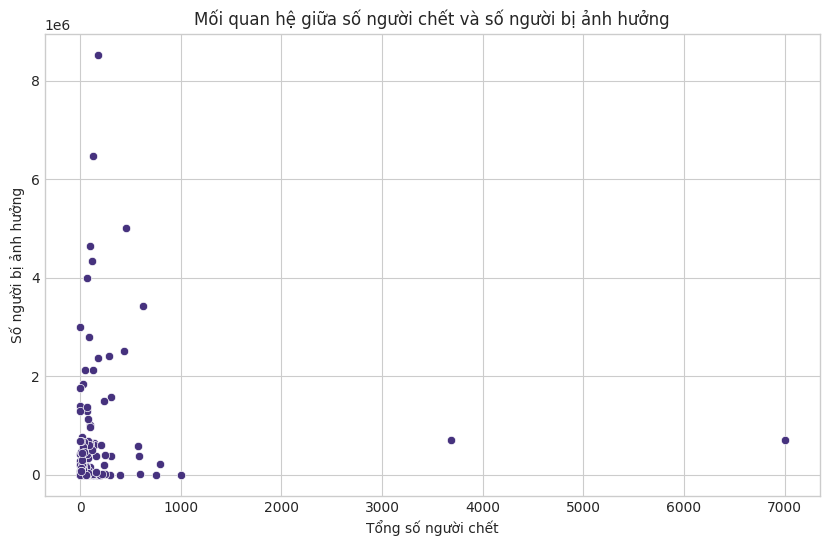

In [146]:

impact_columns_scatter = ['Total Deaths', 'No. Affected']

df_impact = df[impact_columns_scatter]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Deaths', y='No. Affected', data=df_impact)
plt.xlabel('Tổng số người chết')
plt.ylabel('Số người bị ảnh hưởng')
plt.title('Mối quan hệ giữa số người chết và số người bị ảnh hưởng')
plt.show()

## Phân tích mối quan hệ và tương quan

Tạo Heatmap để hiển thị ma trận tương quan giữa các biến số định lượng liên quan đến tác động (số người chết, số người bị ảnh hưởng, thiệt hại kinh tế).


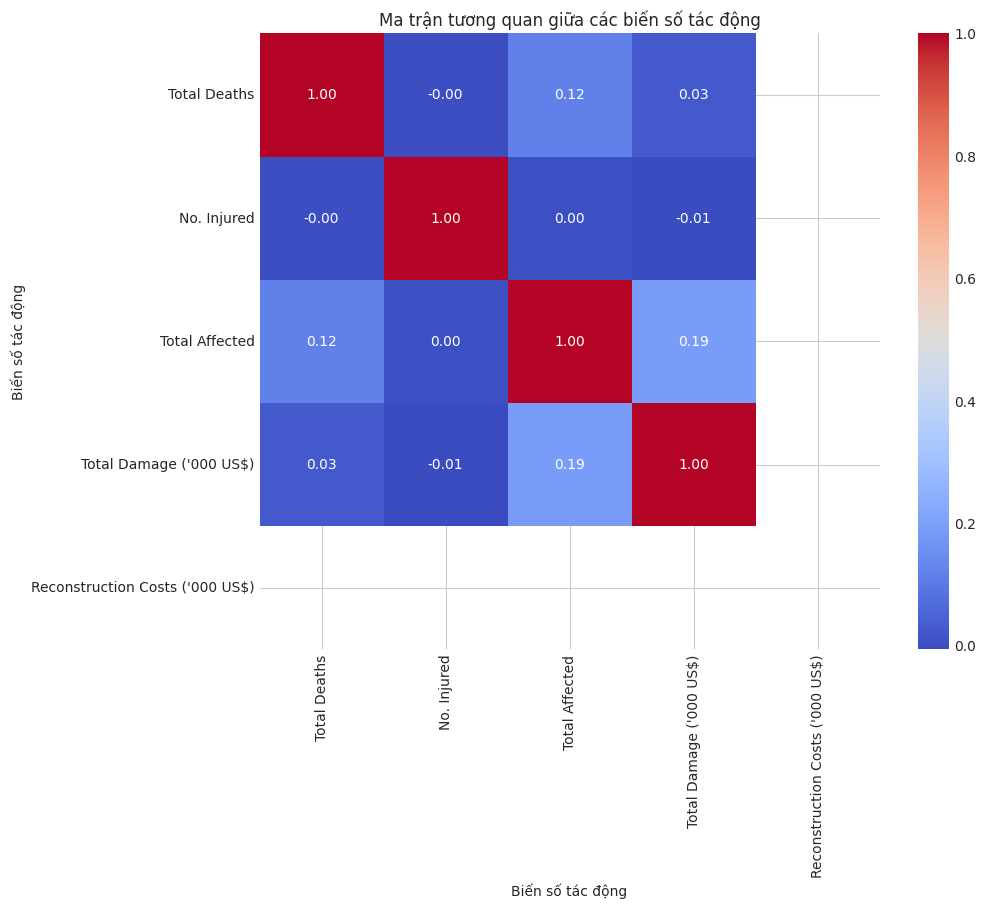

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

impact_columns = ['Total Deaths', 'No. Injured', 'Total Affected', 'Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$\')', 'Reconstruction Costs (\'000 US$)', 'Reconstruction Costs, Adjusted (\'000 US$\')', 'Insured Damage (\'000 US$\')', 'Insured Damage, Adjusted (\'000 US$\')']

existing_impact_columns = [col for col in impact_columns if col in df.columns]

correlation_matrix = df[existing_impact_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.xlabel('Biến số tác động')
plt.ylabel('Biến số tác động')
plt.title('Ma trận tương quan giữa các biến số tác động')

plt.show()

Tạo dữ liệu cho Chord Diagram cần tổng hợp dữ liệu về số lượng sự kiện thiên tai cho từng cặp (Loại hình thiên tai, Tỉnh/Thành phố).

In [148]:

def extract_provinces(admin_units_str):
    provinces = []
    if isinstance(admin_units_str, str) and admin_units_str != 'Unknown':
        try:
            admin_units_list = json.loads(admin_units_str)
            for unit in admin_units_list:
                province_name = unit.get('adm1_name')
                if province_name:
                    provinces.append(province_name)
        except json.JSONDecodeError:
            pass
    return provinces

df['Provinces'] = df['Admin Units'].apply(extract_provinces)

disaster_province_pairs = []
for index, row in df.iterrows():
    disaster_type = row['Disaster Type']
    provinces = row['Provinces']
    if provinces:
        for province in provinces:
            disaster_province_pairs.append((disaster_type, province))

disaster_province_counts = pd.DataFrame(disaster_province_pairs, columns=['Disaster Type', 'Province'])
disaster_province_counts = disaster_province_counts.groupby(['Disaster Type', 'Province']).size().reset_index(name='Count')

print("Sample data for Chord Diagram:")
display(disaster_province_counts.head())

disaster_types_unique = disaster_province_counts['Disaster Type'].unique()
provinces_unique = disaster_province_counts['Province'].unique()

print("\nUnique Disaster Types:")
print(disaster_types_unique)

print("\nUnique Provinces:")
print(provinces_unique)

Sample data for Chord Diagram:


,Disaster Type,Province,Count
0,Drought,An Giang,3
1,Drought,Ba Ria-Vung Tau,1
2,Drought,Bac Lieu,1
3,Drought,Ben Tre,3
4,Drought,Binh Dinh,1



Unique Disaster Types:
['Drought' 'Flood' 'Storm' 'Wildfire']

Unique Provinces:
['An Giang' 'Ba Ria-Vung Tau' 'Bac Lieu' 'Ben Tre' 'Binh Dinh'
 'Binh Duong' 'Binh Phuoc' 'Binh Thuan' 'Ca Mau' 'Can Tho city' 'Dak Lak'
 'Dak Nong' 'Dong Nai' 'Dong Thap' 'Gia Lai' 'Hau Giang'
 'Ho Chi Minh City' 'Khanh Hoa' 'Kien Giang' 'Kon Tum' 'Lam Dong'
 'Long An' 'Ninh Thuan' 'Phu Yen' 'Quang Nam' 'Quang Ngai' 'Soc Trang'
 'Tay Ninh' 'Tien Giang' 'Tra Vinh' 'Vinh Long' 'Bac Giang' 'Bac Kan'
 'Bac Ninh' 'Cao Bang' 'Da Nang City' 'Dien Bien' 'Ha Giang' 'Ha Nam'
 'Ha Noi City' 'Ha Tay' 'Ha Tinh' 'Hai Duong' 'Hai Phong City' 'Hoa Binh'
 'Hung Yen' 'Lai Chau' 'Lang Son' 'Lao Cai' 'Nam Dinh' 'Nghe An'
 'Ninh Binh' 'Phu Tho' 'Quang Binh' 'Quang Ninh' 'Quang Tri' 'Son La'
 'Thai Binh' 'Thai Nguyen' 'Thanh Hoa' 'Thua Thien - Hue' 'Tuyen Quang'
 'Vinh Phuc' 'Yen Bai']


Chord Diagram thể hiện mối liên hệ giữa các loại hình thiên tai và các tỉnh/thành phố bị ảnh hưởng.

In [149]:
import plotly.graph_objects as go

nodes = list(disaster_types_unique) + list(provinces_unique)
node_indices = {node: i for i, node in enumerate(nodes)}

source_indices = []
target_indices = []
values = []

for index, row in disaster_province_counts.iterrows():
    source_node = row['Disaster Type']
    target_node = row['Province']
    value = row['Count']

    if source_node in node_indices and target_node in node_indices:
        source_indices.append(node_indices[source_node])
        target_indices.append(node_indices[target_node])
        values.append(value)
    else:
        print(f"Skipping row due to missing node: {row}")


fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=nodes,
      color="blue"
    ),
    link=dict(
      source=source_indices,
      target=target_indices,
      value=values,

    ))])

fig.update_layout(title_text="Mối liên hệ giữa loại hình thiên tai và các tỉnh/thành phố bị ảnh hưởng", font_size=10)
fig.show()


Nhóm dữ liệu theo năm hoặc tháng và đếm số lượng sự kiện.


In [150]:
yearly_disaster_counts = df['Start Year Actual'].value_counts().sort_index()

print("Yearly Disaster Counts:")
display(yearly_disaster_counts)

Yearly Disaster Counts:


,count
Start Year Actual,
1953,1
1956,1
1964,3
1966,1
1967,1
1970,1
1971,2
1973,1
1975,1


## Biểu đồ đường thể hiện xu hướng theo thời gian

Tạo biểu đồ đường hiển thị xu hướng số lượng sự kiện thiên tai theo năm.


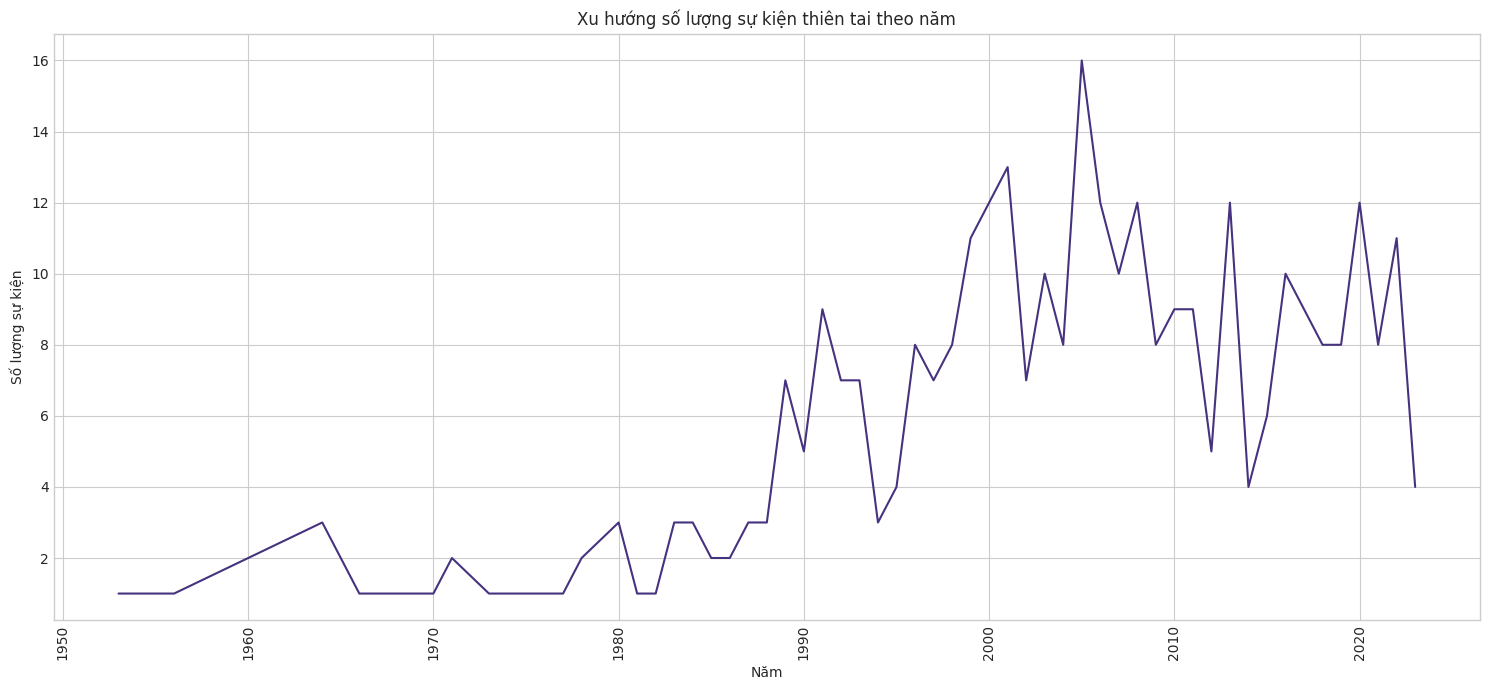

In [151]:
plt.figure(figsize=(15, 7))
plt.plot(yearly_disaster_counts.index, yearly_disaster_counts.values)

plt.xlabel("Năm")
plt.ylabel("Số lượng sự kiện")
plt.title("Xu hướng số lượng sự kiện thiên tai theo năm")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Pie chart cho phân bố loại hình thiên tai

Sử dụng dữ liệu đếm số lượng sự kiện theo loại hình thiên tai đã có và tạo Pie Chart để hiển thị tỷ lệ phần trăm.


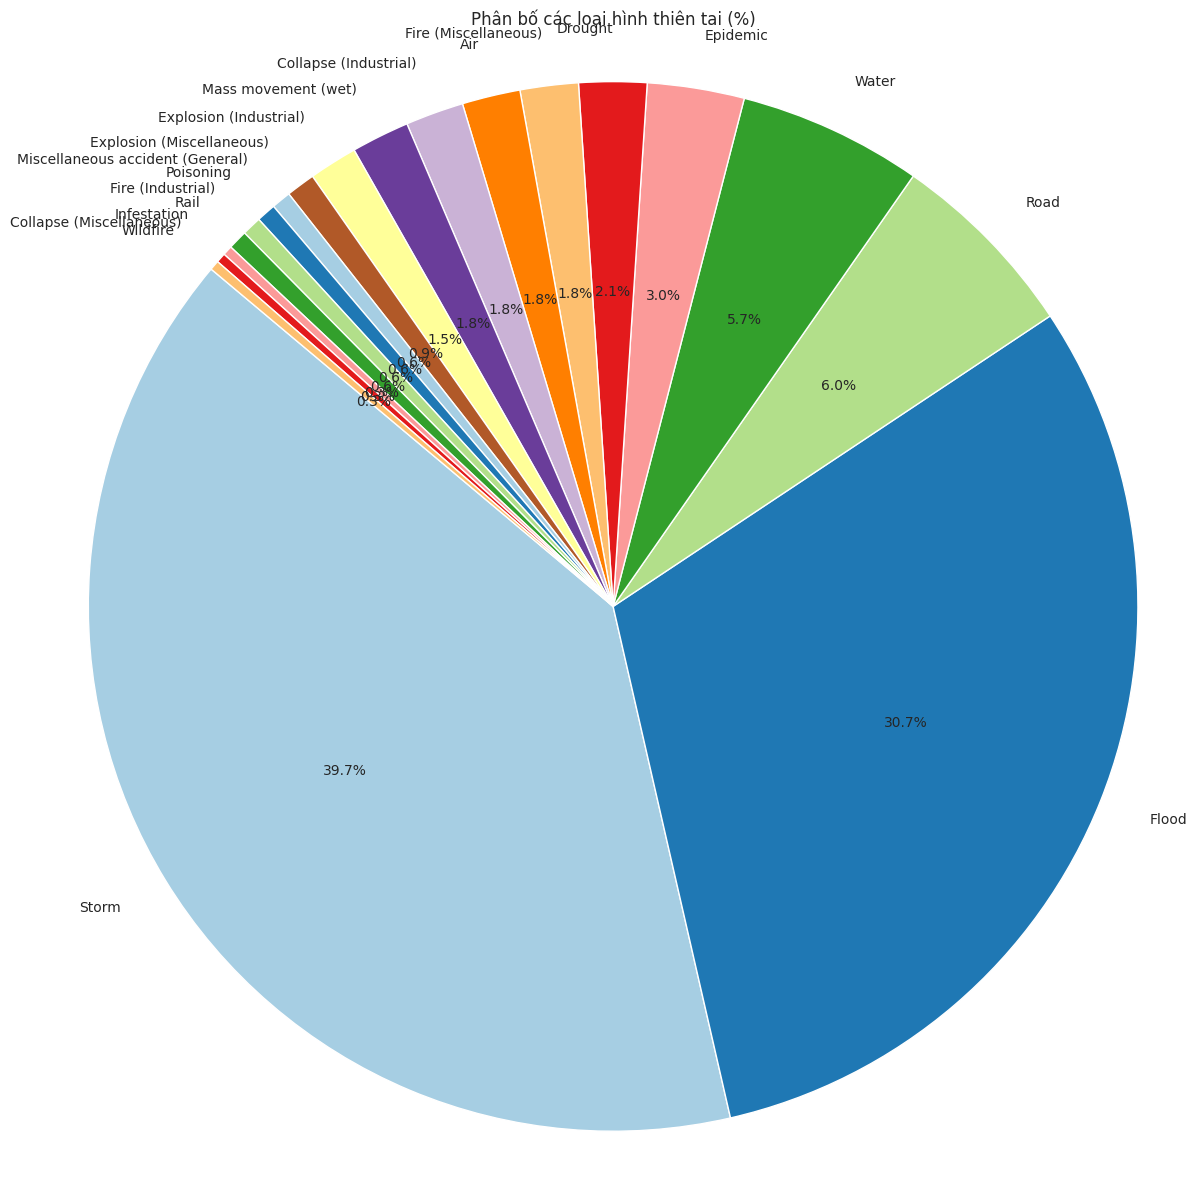

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

colors = sns.color_palette('Paired')[0:len(disaster_type_counts)]
plt.pie(disaster_type_counts.values, labels=disaster_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Phân bố các loại hình thiên tai (%)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Histogram/boxplot cho biến tác động

Tạo Histogram và Boxplot cho các biến tác động quan trọng để xem phân bố tần suất và xác định giá trị ngoại lệ.


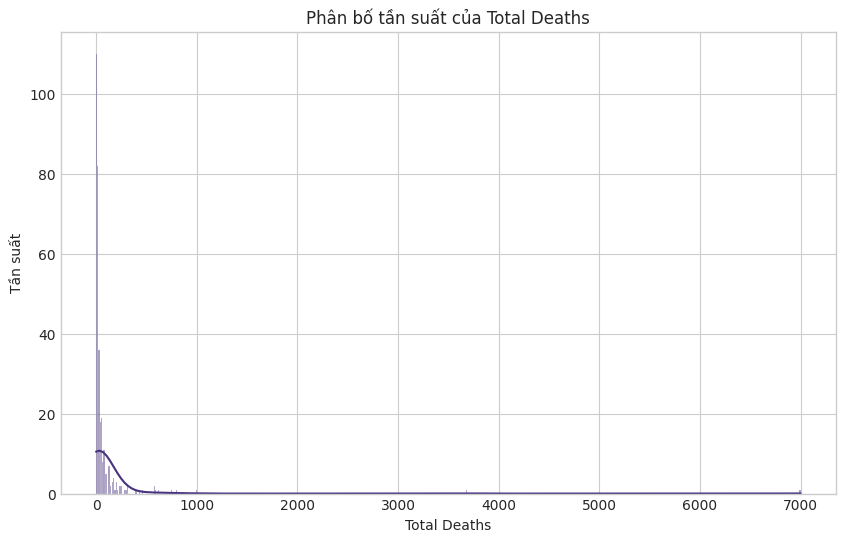

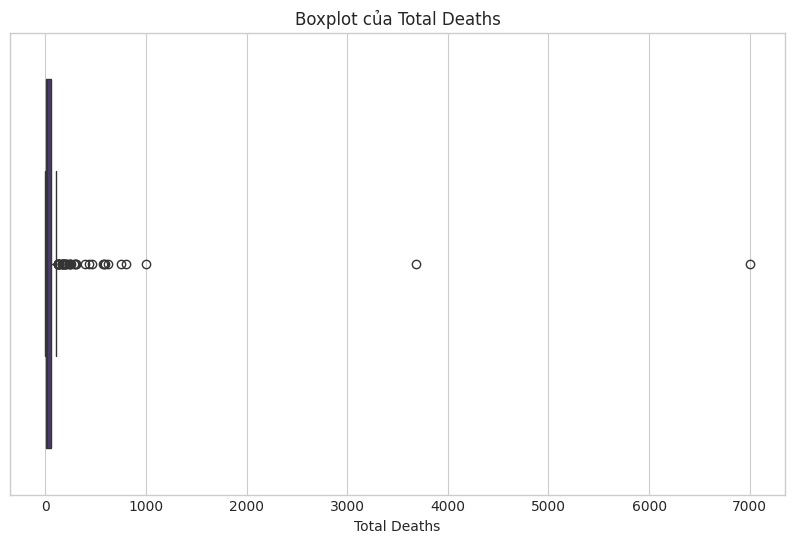

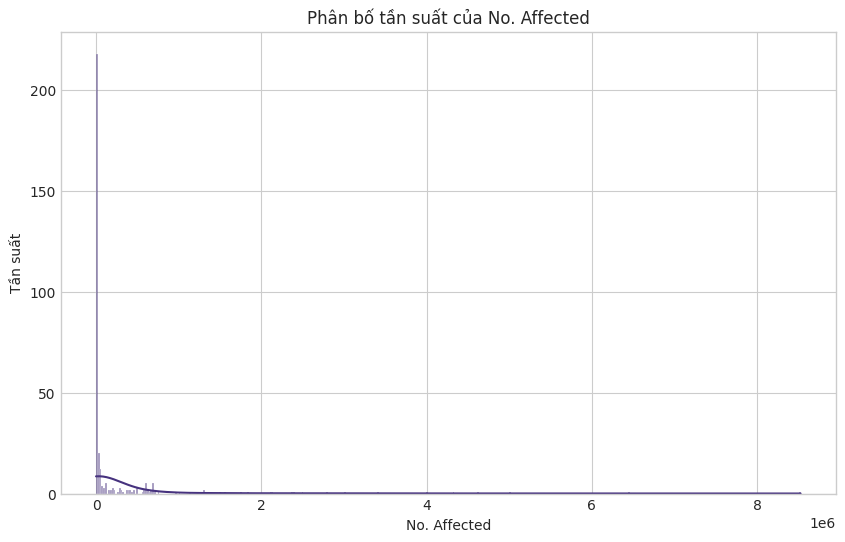

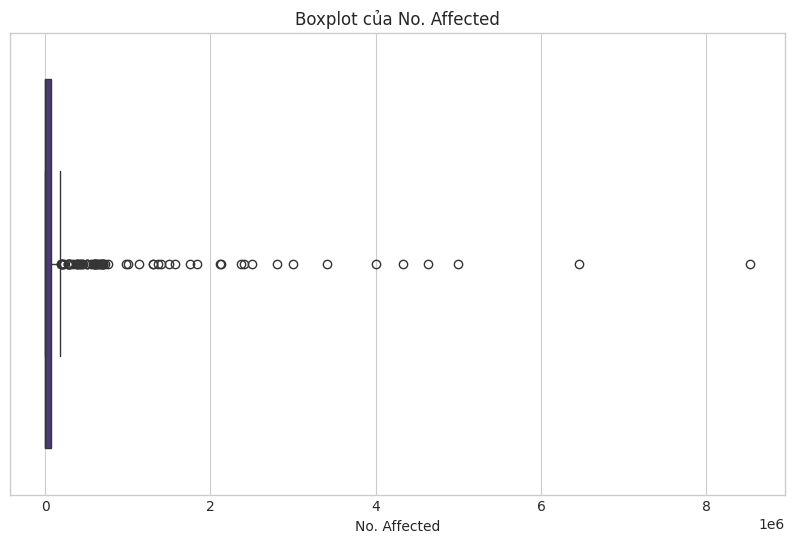

Column 'Total Damage, Adjusted ('000 US$')' not found in the DataFrame.


In [155]:
impact_columns_viz = ['Total Deaths', 'No. Affected', 'Total Damage, Adjusted (\'000 US$\')']

for col in impact_columns_viz:
    if col in df.columns:
        # Create Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Phân bố tần suất của {col}')
        plt.xlabel(col)
        plt.ylabel('Tần suất')
        plt.show()

        # Create Boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot của {col}')
        plt.xlabel(col)
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

## Histogram/boxplot cho biến tác động

Tạo Histogram và Boxplot cho biến tác động 'Total Damage, Adjusted ('000 US$')' để xem phân bố tần suất và xác định giá trị ngoại lệ.


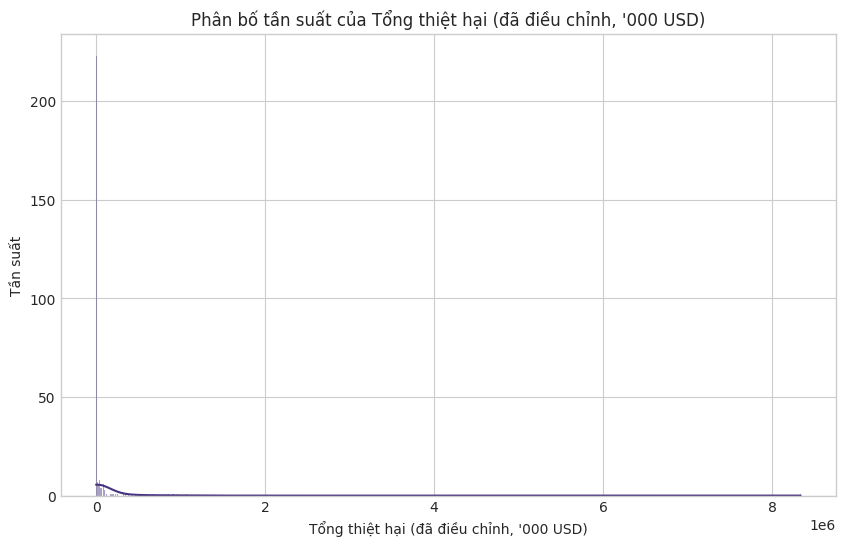

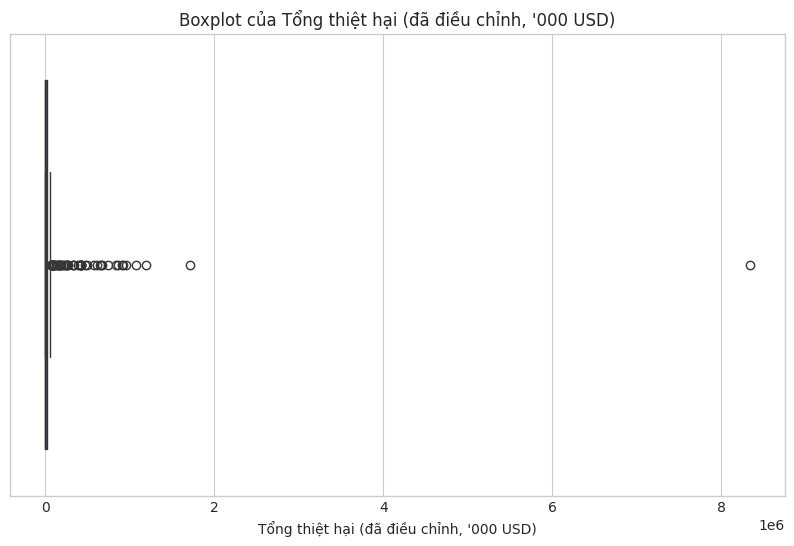

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Damage, Adjusted (\'000 US$)'], kde=True)
plt.title('Phân bố tần suất của Tổng thiệt hại (đã điều chỉnh, \'000 USD)')
plt.xlabel('Tổng thiệt hại (đã điều chỉnh, \'000 USD)')
plt.ylabel('Tần suất')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Damage, Adjusted (\'000 US$)'])
plt.title('Boxplot của Tổng thiệt hại (đã điều chỉnh, \'000 USD)')
plt.xlabel('Tổng thiệt hại (đã điều chỉnh, \'000 USD)')
plt.show()

## Wordcloud (nếu có dữ liệu phù hợp)

Kiểm tra các cột chứa mô tả văn bản (ví dụ: 'Event Name', 'Origin', 'Associated Types'), làm sạch văn bản (xóa stop words, dấu câu), và tạo WordCloud từ các từ phổ biến nhất nếu có dữ liệu hữu ích.


In [157]:
import re

text_columns = ['Event Name', 'Origin', 'Associated Types', 'Disaster Subtype']

df['combined_text'] = df[text_columns].astype(str).agg(' '.join, axis=1)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)

all_words = ' '.join(df['cleaned_text']).split()

print("First 10 words after cleaning and tokenization:")
print(all_words[:10])

First 10 words after cleaning and tokenization:
['nan', 'nan', 'nan', 'tropical', 'cyclone', 'nan', 'nan', 'nan', 'tropical', 'cyclone']


In [158]:
from collections import Counter

vietnamese_stop_words = [
    'là', 'của', 'và', 'trong', 'trên', 'được', 'với', 'từ', 'thì', 'mà', 'cũng', 'sẽ', 'như',
    'đây', 'đó', 'khi', 'sau', 'trước', 'nếu', 'bởi', 'vì', 'nên', 'hay', 'và', 'nhưng',
    'tuy', 'dù', 'đã', 'đang', 'sẽ', 'vẫn', 'mới', 'cũ', 'này', 'kia', 'vậy', 'thế', 'chưa',
    'không', 'có', 'là', 'một', 'hai', 'ba', 'bốn', 'năm', 'sáu', 'bảy', 'tám', 'chín', 'mười',
    'lớn', 'nhỏ', 'cao', 'thấp', 'dài', 'ngắn', 'rộng', 'hẹp', 'nhiều', 'ít', 'khác', 'tất',
    'cả', 'nhất', 'hơn', 'kém', 'chỉ', 'cả', 'đều', 'từng', 'mỗi', 'mọi', 'những', 'các',
    'loại', 'kiểu', 'chừng', 'khoảng', 'độ', 'nào', 'kia', 'đâu', 'bao', 'giờ', 'khi', 'đến',
    'đi', 'lên', 'xuống', 'vào', 'ra', 'qua', 'lại', 'đến', 'ở', 'tại', 'trên', 'dưới', 'trong',
    'ngoài', 'trước', 'sau', 'bên', 'cạnh', 'giữa', 'về', 'đối', 'với', 'bằng', 'như', 'để',
    'mà', 'thì', 'là', 'với', 'bởi', 'vì', 'do', 'nên', 'khi', 'nếu', 'thì', 'mà', 'của',
    'và', 'hay', 'hoặc', 'nhưng', 'tuy', 'dù', 'cũng', 'vẫn', 'chỉ', 'cả', 'đều', 'từng',
    'mỗi', 'mọi', 'những', 'các', 'loại', 'kiểu', 'chừng', 'khoảng', 'độ', 'nào', 'kia',
    'đâu', 'bao', 'giờ', 'khi', 'đến', 'đi', 'lên', 'xuống', 'vào', 'ra', 'qua', 'lại',
    'đến', 'ở', 'tại', 'trên', 'dưới', 'trong', 'ngoài', 'trước', 'sau', 'bên', 'cạnh',
    'giữa', 'về', 'đối', 'với', 'bằng', 'như', 'để', 'nan'
]

filtered_words = [word for word in all_words if word not in vietnamese_stop_words and len(word) > 1]

word_counts = Counter(filtered_words)

print("Top 10 most common words:")
display(word_counts.most_common(10))

Top 10 most common words:


[('tropical', 152),
 ('flood', 128),
 ('cyclone', 119),
 ('riverine', 52),
 ('land', 52),
 ('mud', 52),
 ('snow', 52),
 ('rock', 52),
 ('heavy', 49),
 ('general', 43)]

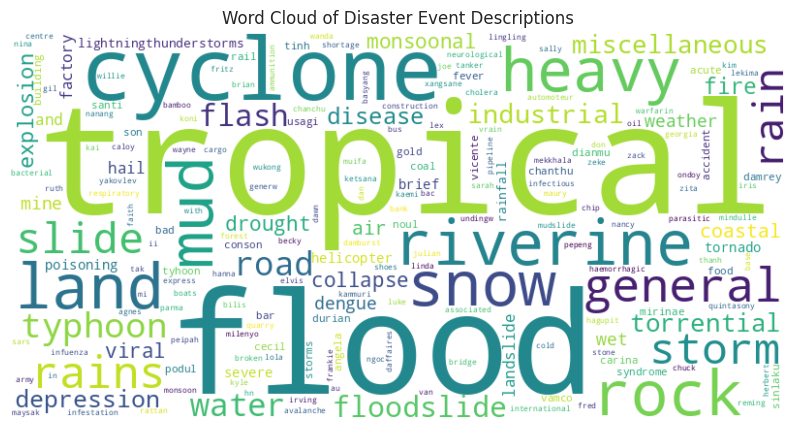

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Event Descriptions')
plt.show()